# TP2 - Ej 3

> Integrantes:

- Aleo, Rodrigo
- Bustillo, Mario
- Luna, Juan Ignacio

> Consigna:

Implementar un sistema de inferencia difusa para controlar un péndulo invertido

● Asuma que el carro no tiene espacio restringido para moverse

● Definir variables lingüísticas de entrada y salida, particiones borrosas, operaciones borrosas para la conjunción, disyunción e implicación, reglas de inferencia (cubrir todas las posibles combinaciones de valores borrosos de entrada en la base de reglas)

● Utilice el siguiente modelo del sistema carro-péndulo

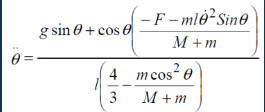

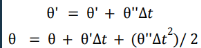

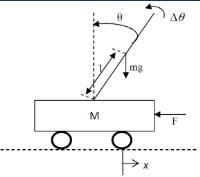

## Importaciones

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product #Usado para crear las posibles combinaciones de reglas
from scipy import constants #Obtenemos la constante de la gravedad

## Conjuntos Borrosos

### Función para generar particiones

In [2]:

# La función particiones_borrosas calcula la membresía para cada conjunto
# Estas particiones borrosas tienen un 50% de solapamiento
def particiones_borrosas(valor, picos, ancho):
    n_particiones = 5 #Cantidad de particiones borrosas
    membresia = []
    
    for i in range(n_particiones):
        if valor <= picos[i] - ancho or valor >= picos[i] + ancho:
            membresia.append(0)
        elif picos[i] - ancho <= valor <= picos[i]:
            membresia.append((valor - (picos[i] - ancho)) / ancho)
        elif picos[i] <= valor <= picos[i] + ancho:
            membresia.append((picos[i] + ancho - valor) / ancho)
        else:
            membresia.append(1)
    
    return membresia

### Variable de entrada: ángulo

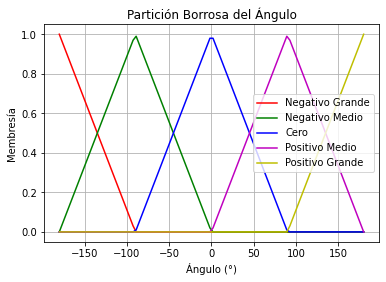

In [3]:
n=100 #Cantidad de puntos

angulo_max = 180
angulo_min = -angulo_max

picos_angulos = [angulo_min, angulo_min/2, 0, angulo_max/2, angulo_max]
ancho_angulos = 90

# Generar datos de ángulo entre -180° y 180°
angulos = np.linspace(angulo_min, angulo_max, n)

# Calcular la membresía para cada ángulo
membresia_angulos = [particiones_borrosas(angulo, picos_angulos, ancho_angulos) for angulo in angulos]

# Graficar los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i in range(len(conjuntos)):
    plt.plot(angulos, [m[i] for m in membresia_angulos], label=conjuntos[i], color=colores[i])

plt.xlabel('Ángulo (°)')
plt.ylabel('Membresía')
plt.title('Partición Borrosa del Ángulo')
plt.legend()
plt.grid(True)
plt.show()


### Variable de entrada: velocidad angular

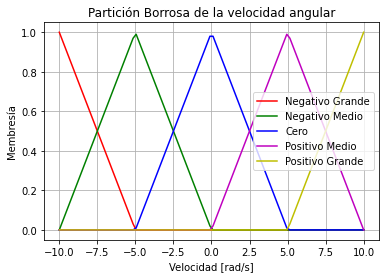

In [4]:
v_max = 10
v_min = -v_max
picos_v = [v_min, v_min/2, 0, v_max/2, v_max]
ancho_v = v_max/2

# Datos de fuerzas entre -10 y 10
velocidades = np.linspace(v_min, v_max, n)

#Calcular membresía para cada velocidad
membresia_velocidades = [particiones_borrosas(velocidad, picos_v, ancho_v) for velocidad in velocidades]

# Graficar los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i in range(len(conjuntos)):
    plt.plot(velocidades, [m[i] for m in membresia_velocidades], label=conjuntos[i], color=colores[i])

plt.xlabel('Velocidad [rad/s]')
plt.ylabel('Membresía')
plt.title('Partición Borrosa de la velocidad angular')
plt.legend()
plt.grid(True)
plt.show()

### Variable de salida: fuerza

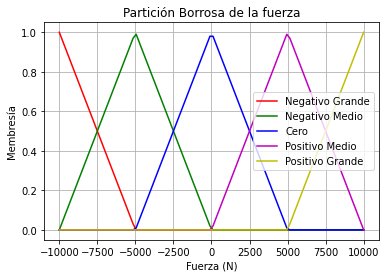

In [5]:
f_max = 10000
f_min = -f_max

picos_f = [f_min, f_min/2, 0, f_max/2, f_max]
ancho_f = f_max/2

# Datos de fuerzas entre -2 y 2
fuerzas = np.linspace(f_min, f_max, n)

#Calcular membresía para cada fuerza
membresia_fuerzas = [particiones_borrosas(fuerza, picos_f, ancho_f) for fuerza in fuerzas]

# Graficar los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i in range(len(conjuntos)):
    plt.plot(fuerzas, [m[i] for m in membresia_fuerzas], label=conjuntos[i], color=colores[i])

plt.xlabel('Fuerza (N)')
plt.ylabel('Membresía')
plt.title('Partición Borrosa de la fuerza')
plt.legend()
plt.grid(True)
plt.show()

## Valores interpolados

He establecido una subdivisión de n elementos en cada membresía (o sea que cada membresía tiene n elementos). Si tengo un ángulo de 45°, por ejemplo, necesito convertir este valor a un índice correspondiente sabiendo que los ángulos van de -180° a 180° y que los índices van de 0 a 99.

In [6]:
#Convierto un ángulo a un valor entre -180 y 180°. Por ejemplo, un ángulo de 190° sería lo mismo que -170°
def ajustar_rango_angulo(angulo):
    while angulo > 180:
        angulo -= 360
    while angulo < -180:
        angulo += 360
    return angulo

#El dominio está discretizado en n puntos. El objetivo es determinar a qué punto de esa discretización pertenece un ángulo en particular
def indice_valor(valor, val_min, val_max, n):
    rango_origen = val_max - (val_min)  # Rango total del valor de origen (-180 a 180)
    rango_destino = n-1  # Rango total del valor de destino (0 a 99)

    # Calculamos la fracción del valor de origen
    fraccion = (valor - (val_min)) / rango_origen

    # Aplicamos la interpolación lineal
    valor_interpolado = fraccion * rango_destino

    # Redondeamos el resultado y lo convertimos a entero
    valor_interpolado = int(round(valor_interpolado))

    # Aseguramos que el valor interpolado esté dentro del rango de destino (0 a n-1)
    valor_interpolado = max(0, min(n-1, valor_interpolado))

    return valor_interpolado


In [7]:
''' Ejemplo ángulo de 0° '''

angulo_entrada = 45
print(f"Ángulo entrada: {angulo_entrada}")

#Llevo al ángulo a un rango entre -180° y 180°
angulo_ajustado = ajustar_rango_angulo(angulo_entrada)
print(f"Angulo ajustado al rango: {angulo_ajustado}")

#Lo convierto el ángulo a un numero entre 0 y n-1 para encontrar a cual value_member pertenece
angulo_entrada_interpolado = indice_valor(angulo_ajustado, -180, 180, n)
print(f"Ángulo entrada indice: {angulo_entrada_interpolado}")

#Vemos la membrecía del ángulo interpolado 
print(membresia_angulos[angulo_entrada_interpolado])

'''Vemos que el resultado tiene sentido ya que casi el 100% pertenece al conjunto Cero'''

Ángulo entrada: 45
Angulo ajustado al rango: 45
Ángulo entrada indice: 62
[0, 0, 0.49494949494949514, 0.5050505050505049, 0]


'Vemos que el resultado tiene sentido ya que casi el 100% pertenece al conjunto Cero'

In [8]:
''' Ejemplo ángulo 180° '''

angulo_entrada = 180
print(f"Ángulo entrada: {angulo_entrada}")

#Llevo al ángulo a un rango entre -180° y 180°
angulo_ajustado = ajustar_rango_angulo(angulo_entrada)
print(f"Angulo ajustado al rango: {angulo_ajustado}")

#Lo convierto el ángulo a un numero entre 0 y 100 para encontrar a cual value_member pertenece
angulo_entrada_interpolado = indice_valor(angulo_ajustado, -180, 180, n)
print(f"Ángulo entrada indice: {angulo_entrada_interpolado}")

#Vemos la membrecía del ángulo interpolado 
print(membresia_angulos[angulo_entrada_interpolado])

'''Vemos que el resultado tiene sentido ya que el 100% pertenece al conjunto Positivo Alto'''

Ángulo entrada: 180
Angulo ajustado al rango: 180
Ángulo entrada indice: 99
[0, 0, 0, 0, 1.0]


'Vemos que el resultado tiene sentido ya que el 100% pertenece al conjunto Positivo Alto'

In [9]:
''' Ejemplo ángulo 190° '''

angulo_entrada = 190
print(f"Ángulo entrada: {angulo_entrada}")

#Llevo al ángulo a un rango entre -180° y 180°
angulo_ajustado = ajustar_rango_angulo(angulo_entrada)
print(f"Angulo ajustado al rango: {angulo_ajustado}")

#Lo convierto el ángulo a un numero entre 0 y 100 para encontrar a cual value_member pertenece
angulo_entrada_interpolado = indice_valor(angulo_ajustado, -180, 180, n)
print(f"Ángulo entrada indice: {angulo_entrada_interpolado}")

#Vemos la membrecía del ángulo interpolado 
print(membresia_angulos[angulo_entrada_interpolado])

'''En este caso, vemos que el +190 se convierte primero a -170° y luego podemos ver que pertenece en un 88% al Negativo Grande y en un 12% a Negativo Medio '''

Ángulo entrada: 190
Angulo ajustado al rango: -170
Ángulo entrada indice: 3
[0.8787878787878788, 0.12121212121212119, 0, 0, 0]


'En este caso, vemos que el +190 se convierte primero a -170° y luego podemos ver que pertenece en un 88% al Negativo Grande y en un 12% a Negativo Medio '

## Reglas

In [10]:
def evaluar_regla(regla, angulo, velocidad):  # Función para evaluar una regla
    if regla["angulo"] == angulo and regla["v"] == velocidad:
        return regla["fuerza"]
    else:
        return None

In [11]:
'''Defino las reglas a usar en un diccionario'''

# reglas = {
#     1: {"angulo": "Negativo Grande",    "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
#     2: {"angulo": "Negativo Grande",    "v": "Negativo Medio",      "fuerza": "Negativo Grande"},
#     3: {"angulo": "Negativo Grande",    "v": "Cero",                "fuerza": "Negativo Grande"},
#     4: {"angulo": "Negativo Grande",    "v": "Positivo Medio",      "fuerza": "Negativo Grande"},
#     5: {"angulo": "Negativo Grande",    "v": "Positivo Grande",     "fuerza": "Cero"},

#     6: {"angulo": "Negativo Medio",     "v": "Negativo Grande",     "fuerza": "Negativo Medio"},
#     7: {"angulo": "Negativo Medio",     "v": "Negativo Medio",      "fuerza": "Negativo Medio"},
#     8: {"angulo": "Negativo Medio",     "v": "Cero",                "fuerza": "Negativo Medio"},
#     9: {"angulo": "Negativo Medio",     "v": "Positivo Medio",      "fuerza": "Cero"},
#     10: {"angulo": "Negativo Medio",    "v": "Positivo Grande",     "fuerza": "Cero"},

#     11: {"angulo": "Cero",              "v": "Negativo Grande",     "fuerza": "Cero"},
#     12: {"angulo": "Cero",              "v": "Negativo Medio",      "fuerza": "Cero"},
#     13: {"angulo": "Cero",              "v": "Cero",                "fuerza": "Cero"},
#     14: {"angulo": "Cero",              "v": "Positivo Medio",      "fuerza": "Cero"},
#     15: {"angulo": "Cero",              "v": "Positivo Grande",     "fuerza": "Cero"},

#     16: {"angulo": "Positivo Medio",    "v": "Negativo Grande",     "fuerza": "Cero"},
#     17: {"angulo": "Positivo Medio",    "v": "Negativo Medio",      "fuerza": "Cero"},
#     18: {"angulo": "Positivo Medio",    "v": "Cero",                "fuerza": "Positivo Medio"},
#     19: {"angulo": "Positivo Medio",    "v": "Positivo Medio",      "fuerza": "Positivo Medio"},
#     20: {"angulo": "Positivo Medio",    "v": "Positivo Grande",     "fuerza": "Positivo Medio"},

#     21: {"angulo": "Positivo Grande",   "v": "Negativo Grande",     "fuerza": "Cero"},
#     22: {"angulo": "Positivo Grande",   "v": "Negativo Medio",      "fuerza": "Positivo Grande"},
#     23: {"angulo": "Positivo Grande",   "v": "Cero",                "fuerza": "Positivo Grande"},
#     24: {"angulo": "Positivo Grande",   "v": "Positivo Medio",      "fuerza": "Positivo Grande"},
#     25: {"angulo": "Positivo Grande",   "v": "Positivo Grande",     "fuerza": "Positivo Grande"}
# }

'Defino las reglas a usar en un diccionario'

In [12]:
reglas = {
    1: {"angulo": "Negativo Grande",    "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
    2: {"angulo": "Negativo Grande",    "v": "Negativo Medio",      "fuerza": "Negativo Grande"},
    3: {"angulo": "Negativo Grande",    "v": "Cero",                "fuerza": "Negativo Medio"},
    4: {"angulo": "Negativo Grande",    "v": "Positivo Medio",      "fuerza": "Negativo Medio"},
    5: {"angulo": "Negativo Grande",    "v": "Positivo Grande",     "fuerza": "Cero"},

    6: {"angulo": "Negativo Medio",     "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
    7: {"angulo": "Negativo Medio",     "v": "Negativo Medio",      "fuerza": "Negativo Grande"},
    8: {"angulo": "Negativo Medio",     "v": "Cero",                "fuerza": "Negativo Medio"},
    9: {"angulo": "Negativo Medio",     "v": "Positivo Medio",      "fuerza": "Cero"},
    10: {"angulo": "Negativo Medio",    "v": "Positivo Grande",     "fuerza": "Cero"},

    11: {"angulo": "Cero",              "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
    12: {"angulo": "Cero",              "v": "Negativo Medio",      "fuerza": "Negativo Medio"},
    13: {"angulo": "Cero",              "v": "Cero",                "fuerza": "Cero"},
    14: {"angulo": "Cero",              "v": "Positivo Medio",      "fuerza": "Positivo Medio"},
    15: {"angulo": "Cero",              "v": "Positivo Grande",     "fuerza": "Positivo Grande"},

    16: {"angulo": "Positivo Medio",    "v": "Negativo Grande",     "fuerza": "Cero"},
    17: {"angulo": "Positivo Medio",    "v": "Negativo Medio",      "fuerza": "Cero"},
    18: {"angulo": "Positivo Medio",    "v": "Cero",                "fuerza": "Positivo Medio"},
    19: {"angulo": "Positivo Medio",    "v": "Positivo Medio",      "fuerza": "Positivo Grande"},
    20: {"angulo": "Positivo Medio",    "v": "Positivo Grande",     "fuerza": "Positivo Grande"},

    21: {"angulo": "Positivo Grande",   "v": "Negativo Grande",     "fuerza": "Cero"},
    22: {"angulo": "Positivo Grande",   "v": "Negativo Medio",      "fuerza": "Positivo Medio"},
    23: {"angulo": "Positivo Grande",   "v": "Cero",                "fuerza": "Positivo Medio"},
    24: {"angulo": "Positivo Grande",   "v": "Positivo Medio",      "fuerza": "Positivo Grande"},
    25: {"angulo": "Positivo Grande",   "v": "Positivo Grande",     "fuerza": "Positivo Grande"}
}

In [13]:
# Ejemplo de evaluación de reglas
posicion_actual = "Negativo Medio"
velocidad_actual = "Negativo Medio"

for regla_id, regla in reglas.items():
    resultado = evaluar_regla(regla, posicion_actual, velocidad_actual)
    if resultado is not None:
        print(f"Regla {regla_id}: La fuerza es '{resultado}'")
        break

'''Ejemplo suponiendo posicion_actual = "Negativo Medio" y velocidad_actual = "Negativo Medio"'''

Regla 7: La fuerza es 'Negativo Grande'


'Ejemplo suponiendo posicion_actual = "Negativo Medio" y velocidad_actual = "Negativo Medio"'

## Evaluar reglas

In [14]:
''' Obtengo los pares de conjuntos a analizar '''

'''Cada ángulo se va a ver proyectado en dos de sus 5 conjuntos difusos. Lo mismo ocurrirá para la velocidad. Lo que hago acá es hacer la combinatoria entre los dos conjuntos del ángulo con los dos de la velocidad, de forma que queden 4 reglas a analizar.

Agrupo de a pares tanto el nombre del conjunto ángulo y velocidad, y también agrupo de a pares el valor que se le da al ángulo y velocidad en cada uno de estos conjuntos'''

def obtener_pares(angulo_entrada, v_entrada):

    global angulo_min, angulo_max, n
    global v_min, v_max
    global conjuntos
    
    #Convierto el ángulo al rango entre -180° y 180°
    angulo_ajustado = ajustar_rango_angulo(angulo_entrada)

    #Obtengo el índice al que pertenece ese ángulo en el dominio
    angulo_entrada_indice = indice_valor(angulo_ajustado, angulo_min, angulo_max, n)

    #Obtengo cuánto pertenece ese ángulo a los diferentes conjuntos de su dominio
    membresia_angulo_entrada = membresia_angulos[angulo_entrada_indice]
    #print(f"Membresias ángulo entrada: {membresia_angulo_entrada}")

    #Hago lo mismo para la velocidad de entrada solo que no hace falta llevarla a ningún rango
    v_entrada_indice = indice_valor(v_entrada, v_min, v_max, n)
    membresia_v_entrada = membresia_velocidades[v_entrada_indice]
    #print(f"Membresias velocidad entrada: {membresia_v_entrada}")

    # Obtener los índices de los elementos no cero en cada lista (o sea, los valores de pertenencia a los conjuntos diferentes de 0)
    indices_l1 = [i for i, elem in enumerate(membresia_angulo_entrada) if elem != 0]
    indices_l2 = [i for i, elem in enumerate(membresia_v_entrada) if elem != 0]

    # Realizar la combinación entre los índices
    combinaciones = list(product(indices_l1, indices_l2))

    # Obtener los pares de elementos correspondientes a las combinaciones
    pares_valores = [(membresia_angulo_entrada[i], membresia_v_entrada[j]) for i, j in combinaciones]

    pares_conjuntos = [(conjuntos[i], conjuntos[j]) for i, j in combinaciones]

    # Imprimir los pares resultantes
    # for i in range(len(pares_valores)):
    #     print(f"Conjunto Angulo - Velocidad: {pares_conjuntos[i]}")
    #     print(f"Valores  Angulo - Velocidad: {pares_valores[i]}\n")

    return pares_valores, pares_conjuntos



In [15]:
def obtener_conjuntos_resultados(pares_valores, pares_conjuntos):
   global reglas
   
   conjuntos_resultado = []
   valores_pertenencia = []

   #Para cada par de conjuntos, recorreré cada regla hasta dar con una que coincida a la situación
   for i in range( len(pares_conjuntos) ):

      for regla_id, regla in reglas.items():
         
         resultado = evaluar_regla(regla, pares_conjuntos[i][0], pares_conjuntos[i][1])
         
         if resultado == None: #Es la situacion donde la regla selecciconada no coincide con el caso analizado
            pass #Paso a analizar la proxima regla
         
         elif not resultado in conjuntos_resultado: #Si se obtiene un resultado nuevo, se agrega sin problemas
            conjuntos_resultado.append(resultado)
            valores_pertenencia.append(min(pares_valores[i])) #Tomo el mínimo valor de pertenencia, ya que esto hace referencia a la intersección de conjuntos
            break #Analizo la proximo par de conjuntos

         #Puede ocurrir que se obtenga dos o más veces el MISMO conjunto de salida para la fuerza. En este caso, me quedo siempre con el que tenga el máximo valor ya que es la operación que indica la unión de conjuntos
         elif resultado in conjuntos_resultado:
            
            #Obtengo en qué indice se encuentra el resultado viejo
            indice = conjuntos_resultado.index(resultado)

            if min(pares_valores[i]) > valores_pertenencia[indice]: #Comparo el que ya tenía con el nuevo y verifico que el nuevo sea mayor
               valores_pertenencia[indice] = min(pares_valores[i])
               break #Analizo la proximo par de conjuntos
            else:
               break #Analizo la proximo par de conjuntos
   
   return valores_pertenencia, conjuntos_resultado
        

# Creo una lista donde tenga los picos de los conjuntos de fuera obtenidos.
#Ej: el conjunto Cero corresponde al pico en 0; Positivo Grande corresponde a F_max y así
def convertir_conjuntos_a_picos(lista_conjuntos):
   global picos_f
   
   picos_resultados = []

   for conjunto in lista_conjuntos:
      if conjunto == 'Negativo Grande':
         picos_resultados.append(picos_f[0])
      elif conjunto == 'Negativo Medio':
         picos_resultados.append(picos_f[1])
      elif conjunto == 'Cero':
         picos_resultados.append(picos_f[2])
      elif conjunto == 'Positivo Medio':
         picos_resultados.append(picos_f[3])
      elif conjunto == 'Positivo Grande':
         picos_resultados.append(picos_f[4])
   
   return picos_resultados

## Desborrosificador: Media de centros

In [16]:
def desborrosificador(picos_resultados, valores_pertenencia):

    # print(picos_resultados)
    # print(valores_pertenencia)

    media_centros = np.average(picos_resultados, weights=valores_pertenencia)
    #print(f"La fuerza desborrosificada tiene un valor de {media_centros:0.3} N")

    return media_centros

# Función final

In [17]:
def calcular_F(angulo, velocidad):
    global conjuntos
    #El ángulo recibido debe estar en [°]
    #La velocidad debe estar en [rad/s]

    pares_valores, pares_conjuntos = obtener_pares(angulo, velocidad)

    # print(pares_valores)
    # print(pares_conjuntos)

    valores_pertenencia, conjuntos_resultado = obtener_conjuntos_resultados(pares_valores, pares_conjuntos)
    
    picos_resultados = convertir_conjuntos_a_picos(conjuntos_resultado)

    F = desborrosificador(picos_resultados, valores_pertenencia)

    return F

# Aplicación a péndulo

## Constantes

In [18]:
CONSTANTE_M = 2 # Masa del carro
CONSTANTE_m = 1 # Masa de la pertiga
CONSTANTE_l = 1 # Longitud dela pertiga

## Funciones del modelo

In [19]:
def simular(t_max, delta_t, theta_0, v_0, a_0):
  theta = (theta_0 * np.pi) / 180
  v = v_0
  a = a_0
  F = calcular_F(theta_0, v_0)

  # Simular
  acel_angulares = []
  vel_angulares = []
  fuerzas = []
  y = []
  x = np.arange(0, t_max, delta_t)
  for t in x:

    a = calcula_aceleracion(theta, v, F)
    acel_angulares.append(a)

    v = v + a * delta_t
    vel_angulares.append(v)
    
    theta = theta + v * delta_t + a * np.power(delta_t, 2) / 2
    y.append(theta*180/np.pi)

    F = calcular_F(theta*180/np.pi, v)
    fuerzas.append(F)

  #print(f'Vmax={max(velocidades)} --- Vmin={min(velocidades)}')

  return y, x, acel_angulares, vel_angulares, fuerzas


# Calcula la aceleracion en el siguiente instante de tiempo dado el angulo y la velocidad angular actual, y la fuerza ejercida
def calcula_aceleracion(theta, v, F):
    numerador = constants.g * np.sin(theta) + np.cos(theta) * ((-F - CONSTANTE_m * CONSTANTE_l * np.power(v, 2) * np.sin(theta)) / (CONSTANTE_M + CONSTANTE_m))
    denominador = CONSTANTE_l * (4/3 - (CONSTANTE_m * np.power(np.cos(theta), 2) / (CONSTANTE_M + CONSTANTE_m)))
    return numerador / denominador


def graficar(x,y, acel_angulares, vel_angulares, fuerzas):
  
  # Configuración del tamaño de las gráficas y el orden
  figsize = (10, 8)  # Tamaño de la figura (ancho, alto)
 
  # Crear la figura y las subtramas
  fig, axs = plt.subplots(4, 1, figsize=(10, 15))

  i=0
  j=2
  k=3
  h=1

  # Subtrama 1
  axs[i].plot(x, y, color='r')
  axs[i].set_title('Ángulo en el tiempo')
  axs[i].set_xlabel('t [s]')
  axs[i].set_ylabel('Theta [°]')
  axs[i].grid(True)

  # Subtrama 2
  axs[j].plot(x, acel_angulares, color='b')
  axs[j].set_title('Aceleración angular en el tiempo')
  axs[j].set_xlabel('t [s]')
  axs[j].set_ylabel('Alfa [rad/s^2]')
  axs[j].grid(True)

  # Subtrama 3
  axs[k].plot(x, vel_angulares, color='m')
  axs[k].set_title('Velocidad angular en el tiempo')
  axs[k].set_xlabel('t [s]')
  axs[k].set_ylabel('Omwga [rad/s]')
  axs[k].grid(True)

  # Subtrama 4
  axs[h].plot(x, fuerzas, color='g')
  axs[h].set_title('Fuerza en el tiempo')
  axs[h].set_xlabel('t [s]')
  axs[h].set_ylabel('F [N]')
  axs[h].grid(True)

  # Ajustar el espaciado entre las subtramas
  plt.tight_layout()

  # Mostrar el gráfico
  plt.show()


## Simulación

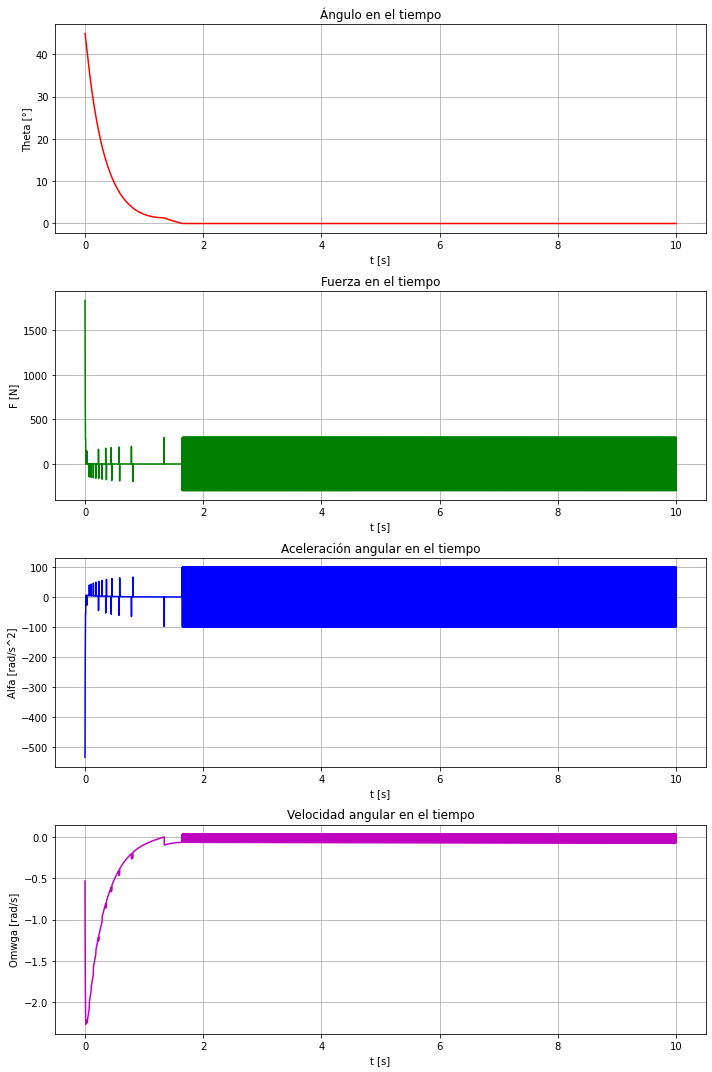

In [21]:
delta_t = 0.001
t_max = 10
theta_0 = 45
v_0 = 0
a_0 = 0

y, x, acel_angulares, vel_angulares, fuerzas= simular(t_max = t_max,
                                             delta_t = delta_t,
                                             theta_0 = theta_0,
                                             v_0 = v_0,
                                             a_0 = a_0)

graficar(x, y, acel_angulares, vel_angulares, fuerzas)